# Preprocessing the data

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Loading dataset
data = pd.read_csv("Dissolved O2.csv")

# Display the first few rows
data.head()


,Id,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,1,10.90,10.60,NaN,NaN,NaN,NaN,NaN,0.63,0.600,...,NaN,NaN,NaN,6.80,5.40,NaN,NaN,NaN,NaN,NaN
1,2,13.15,12.62,NaN,NaN,NaN,NaN,NaN,1.50,0.870,...,NaN,NaN,NaN,4.71,4.20,NaN,NaN,NaN,NaN,NaN
2,32,3.80,6.50,NaN,NaN,NaN,NaN,NaN,0.32,0.540,...,NaN,NaN,NaN,2.10,3.40,NaN,NaN,NaN,NaN,NaN
3,40,10.45,10.65,NaN,NaN,NaN,NaN,NaN,1.38,1.635,...,NaN,NaN,NaN,5.35,5.85,NaN,NaN,NaN,NaN,NaN
4,43,8.10,8.10,NaN,NaN,NaN,NaN,NaN,1.72,1.680,...,NaN,NaN,NaN,4.80,5.30,NaN,NaN,NaN,NaN,NaN


In [2]:
# cheking null data
data.isnull().sum()

Id         0
O2_1       0
O2_2       0
O2_3      48
O2_4      48
O2_5      47
O2_6      49
O2_7      49
NH4_1      0
NH4_2      0
NH4_3     48
NH4_4     48
NH4_5     47
NH4_6     49
NH4_7     49
NO2_1      0
NO2_2      0
NO2_3     48
NO2_4     48
NO2_5     47
NO2_6     49
NO2_7     49
NO3_1      0
NO3_2      0
NO3_3     48
NO3_4     48
NO3_5     47
NO3_6     49
NO3_7     49
BOD5_1     0
BOD5_2     0
BOD5_3    48
BOD5_4    48
BOD5_5    47
BOD5_6    49
BOD5_7    49
dtype: int64

In [3]:
# Select relevant columns and drop missing values
cleaned_data = data[['O2_1','NH4_1','NO2_1','BOD5_1']].dropna()

# Display summary of cleaned data
cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   O2_1    63 non-null     float64
 1   NH4_1   63 non-null     float64
 2   NO2_1   63 non-null     float64
 3   BOD5_1  63 non-null     float64
dtypes: float64(4)
memory usage: 2.1 KB


In [4]:
#shape
print("rows","columns")
data.shape

rows columns


(63, 36)

In [5]:
# Create derived columns for ratios
cleaned_data['O2_NH4_Ratio'] = cleaned_data['O2_1'] / cleaned_data['NH4_1']
cleaned_data['O2_NO2_Ratio'] = cleaned_data['O2_1'] / cleaned_data['NO2_1']
cleaned_data['O2_BOD5_Ratio'] = cleaned_data['O2_1'] / cleaned_data['BOD5_1']

# Preview the transformed data
cleaned_data.head()


,O2_1,NH4_1,NO2_1,BOD5_1,O2_NH4_Ratio,O2_NO2_Ratio,O2_BOD5_Ratio
0,10.90,0.63,0.065,6.80,17.301587,167.692308,1.602941
1,13.15,1.50,0.025,4.71,8.766667,526.000000,2.791932
2,3.80,0.32,0.030,2.10,11.875000,126.666667,1.809524
3,10.45,1.38,0.155,5.35,7.572464,67.419355,1.953271
4,8.10,1.72,0.110,4.80,4.709302,73.636364,1.687500


In [6]:
# Compute descriptive statistics
cleaned_data.describe()

,O2_1,NH4_1,NO2_1,BOD5_1,O2_NH4_Ratio,O2_NO2_Ratio,O2_BOD5_Ratio
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,8.675794,0.413307,0.090204,5.223889,39.870532,185.467845,1.995916
std,2.988272,0.359051,0.108544,1.906394,58.733704,172.258960,1.543569
min,3.420000,0.022000,0.008000,0.620000,4.709302,13.714286,0.502941
25%,6.825000,0.233333,0.034000,3.975000,14.463947,77.563025,1.231855
50%,8.300000,0.340000,0.062500,4.800000,24.888889,137.272727,1.777778
75%,10.200000,0.455000,0.095000,6.400000,41.335784,229.525602,2.214451
max,18.700000,1.720000,0.700000,9.800000,436.363636,1075.000000,11.935484


In [7]:
# Calculate skewness and kurtosis
skewness = cleaned_data.skew()
kurtosis = cleaned_data.kurt()
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)

Skewness:
 O2_1             0.864379
NH4_1            2.352909
NO2_1            3.906103
BOD5_1           0.477623
O2_NH4_Ratio     5.342660
O2_NO2_Ratio     2.809483
O2_BOD5_Ratio    4.595485
dtype: float64
Kurtosis:
 O2_1              1.438845
NH4_1             5.478996
NO2_1            18.400896
BOD5_1            0.134668
O2_NH4_Ratio     34.304202
O2_NO2_Ratio     11.155792
O2_BOD5_Ratio    28.058053
dtype: float64


# EXPLORATORY DATA ANALYSIS 

## UNIVARIATE ANALYSIS

### 1. Visualisation of Dissolved O2 in water

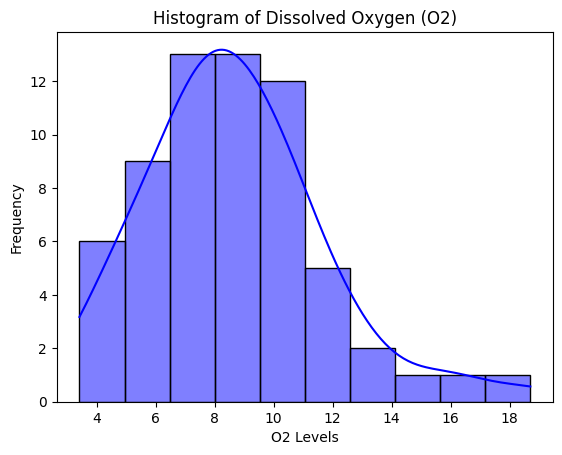

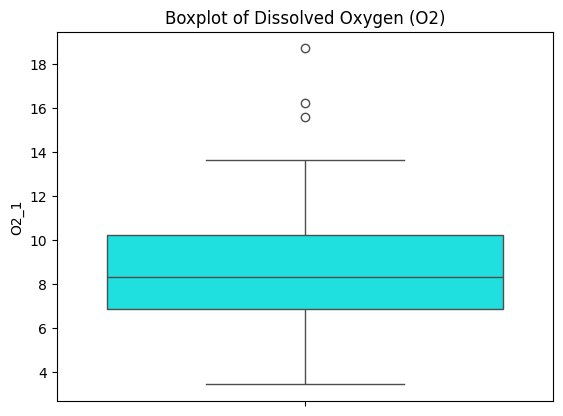

In [8]:
# Histogram for O2 levels
sns.histplot(cleaned_data['O2_1'], kde=True, bins=10, color='blue')
plt.title('Histogram of Dissolved Oxygen (O2)')
plt.xlabel('O2 Levels')
plt.ylabel('Frequency')
plt.show()

# Boxplot for O2 levels
sns.boxplot(cleaned_data['O2_1'], color='cyan')
plt.title('Boxplot of Dissolved Oxygen (O2)')
plt.show()



### 2. Visualisation of Ammonium concentration 

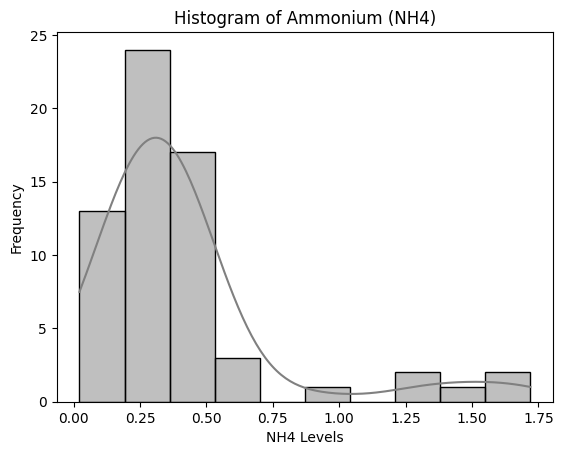

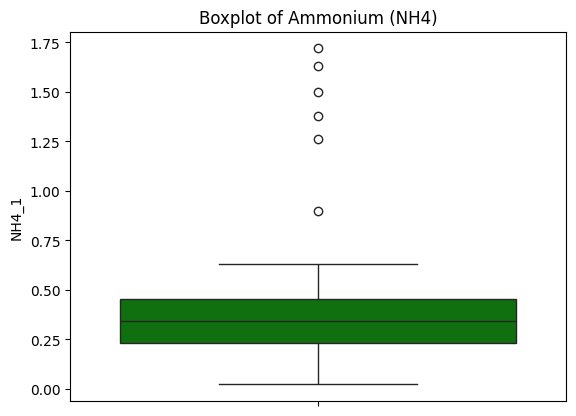

In [9]:
# Histogram for NH4 levels
sns.histplot(cleaned_data['NH4_1'], kde=True, bins=10, color='gray')
plt.title('Histogram of Ammonium (NH4)')
plt.xlabel('NH4 Levels')
plt.ylabel('Frequency')
plt.show()

# Boxplot for NH4 levels
sns.boxplot(cleaned_data['NH4_1'], color='green')
plt.title('Boxplot of Ammonium (NH4)')
plt.show()


### 3. Visualisation of Nitrogen Dioxide concentration 

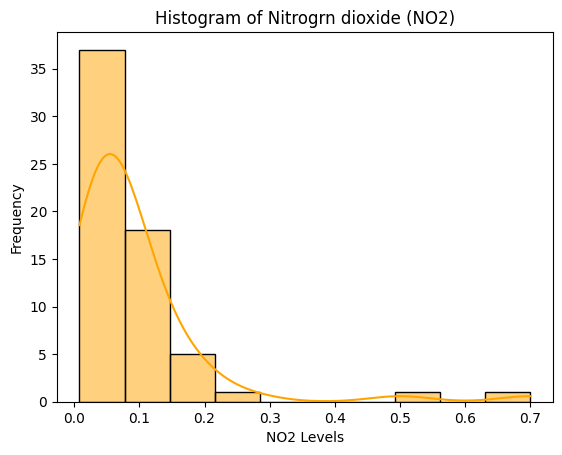

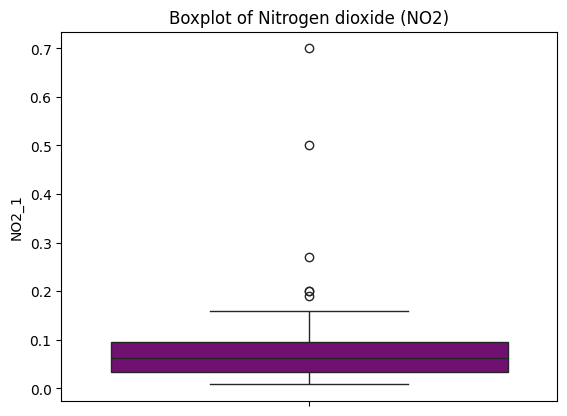

In [10]:
# Histogram for NO2 levels
sns.histplot(cleaned_data['NO2_1'], kde=True, bins=10, color='orange')
plt.title('Histogram of Nitrogrn dioxide (NO2)')
plt.xlabel('NO2 Levels')
plt.ylabel('Frequency')
plt.show()

# Boxplot for NO2 levels
sns.boxplot(cleaned_data['NO2_1'], color='purple')
plt.title('Boxplot of Nitrogen dioxide (NO2)')
plt.show()

### 4.Visualisation of Dissolved Biochemical O2 demand

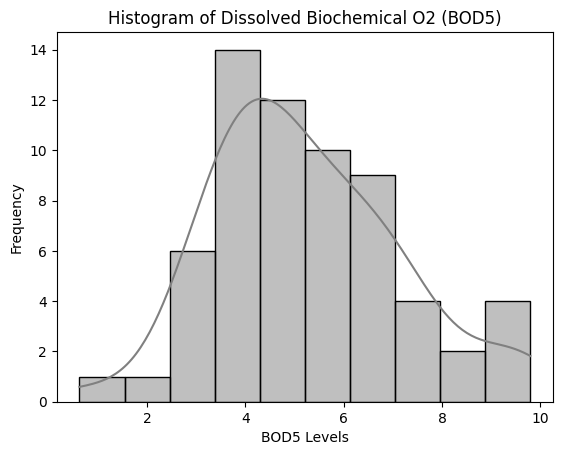

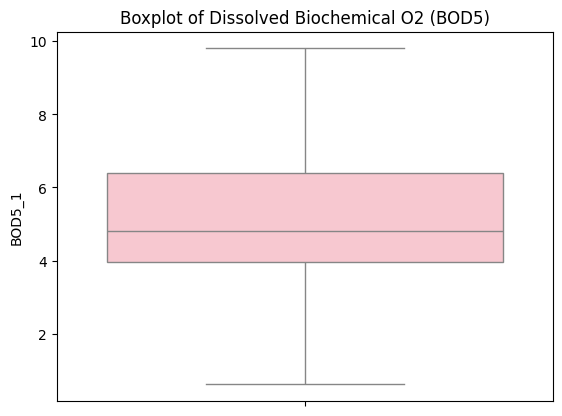

In [11]:
# Histogram for BOD5 levels
sns.histplot(cleaned_data['BOD5_1'], kde=True, bins=10, color='gray')
plt.title('Histogram of Dissolved Biochemical O2 (BOD5)')
plt.xlabel('BOD5 Levels')
plt.ylabel('Frequency')
plt.show()

# Boxplot for BOD5 levels
sns.boxplot(cleaned_data['BOD5_1'], color='pink')
plt.title('Boxplot of Dissolved Biochemical O2 (BOD5)')
plt.show()

## BIVARIATE ANALYSIS

### Ratio of O2/NH4

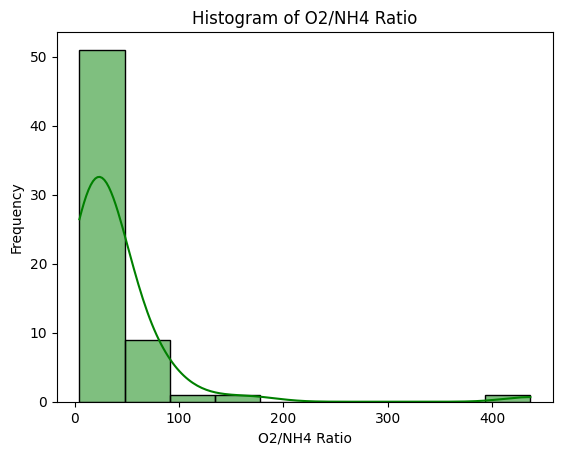

In [12]:
# Histogram for O2/NH4 Ratio
sns.histplot(cleaned_data['O2_NH4_Ratio'], kde=True, bins=10, color='green')
plt.title('Histogram of O2/NH4 Ratio')
plt.xlabel('O2/NH4 Ratio')
plt.ylabel('Frequency')
plt.show()

### Ratio of O2/NO2

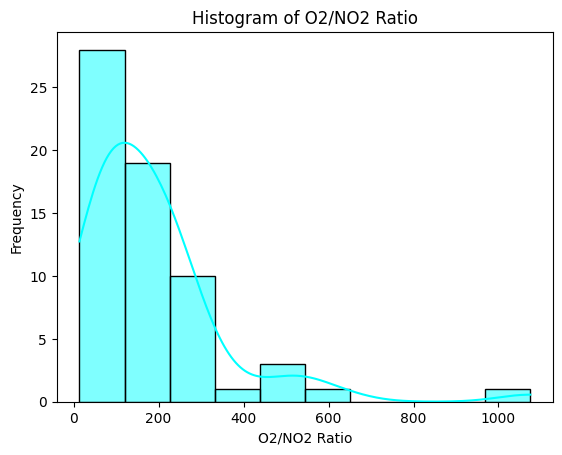

In [13]:
# Histogram for O2/NO2 Ratio
sns.histplot(cleaned_data['O2_NO2_Ratio'], kde=True, bins=10, color='cyan')
plt.title('Histogram of O2/NO2 Ratio')
plt.xlabel('O2/NO2 Ratio')
plt.ylabel('Frequency')
plt.show()


### Ratio of O2/BOD5

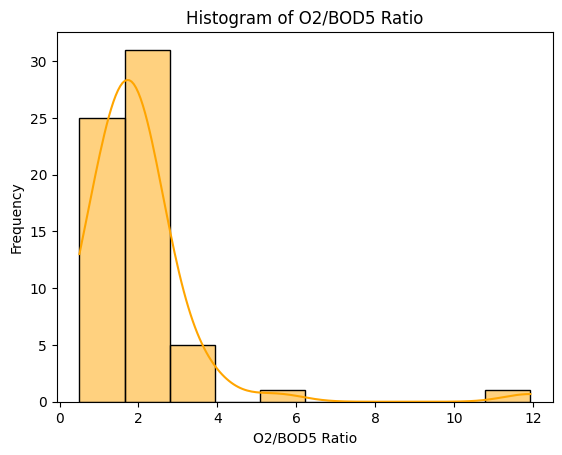

In [14]:
# Histogram for O2/BOD5 Ratio
sns.histplot(cleaned_data['O2_BOD5_Ratio'], kde=True, bins=10, color='orange')
plt.title('Histogram of O2/BOD5 Ratio')
plt.xlabel('O2/BOD5 Ratio')
plt.ylabel('Frequency')
plt.show()


## MULTIVARIATE ANALYSIS

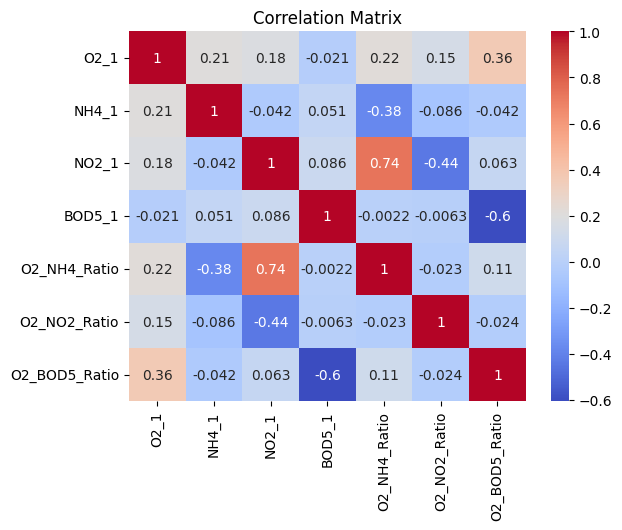

In [15]:
# Compute and visualize correlation matrix
correlation_matrix = cleaned_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


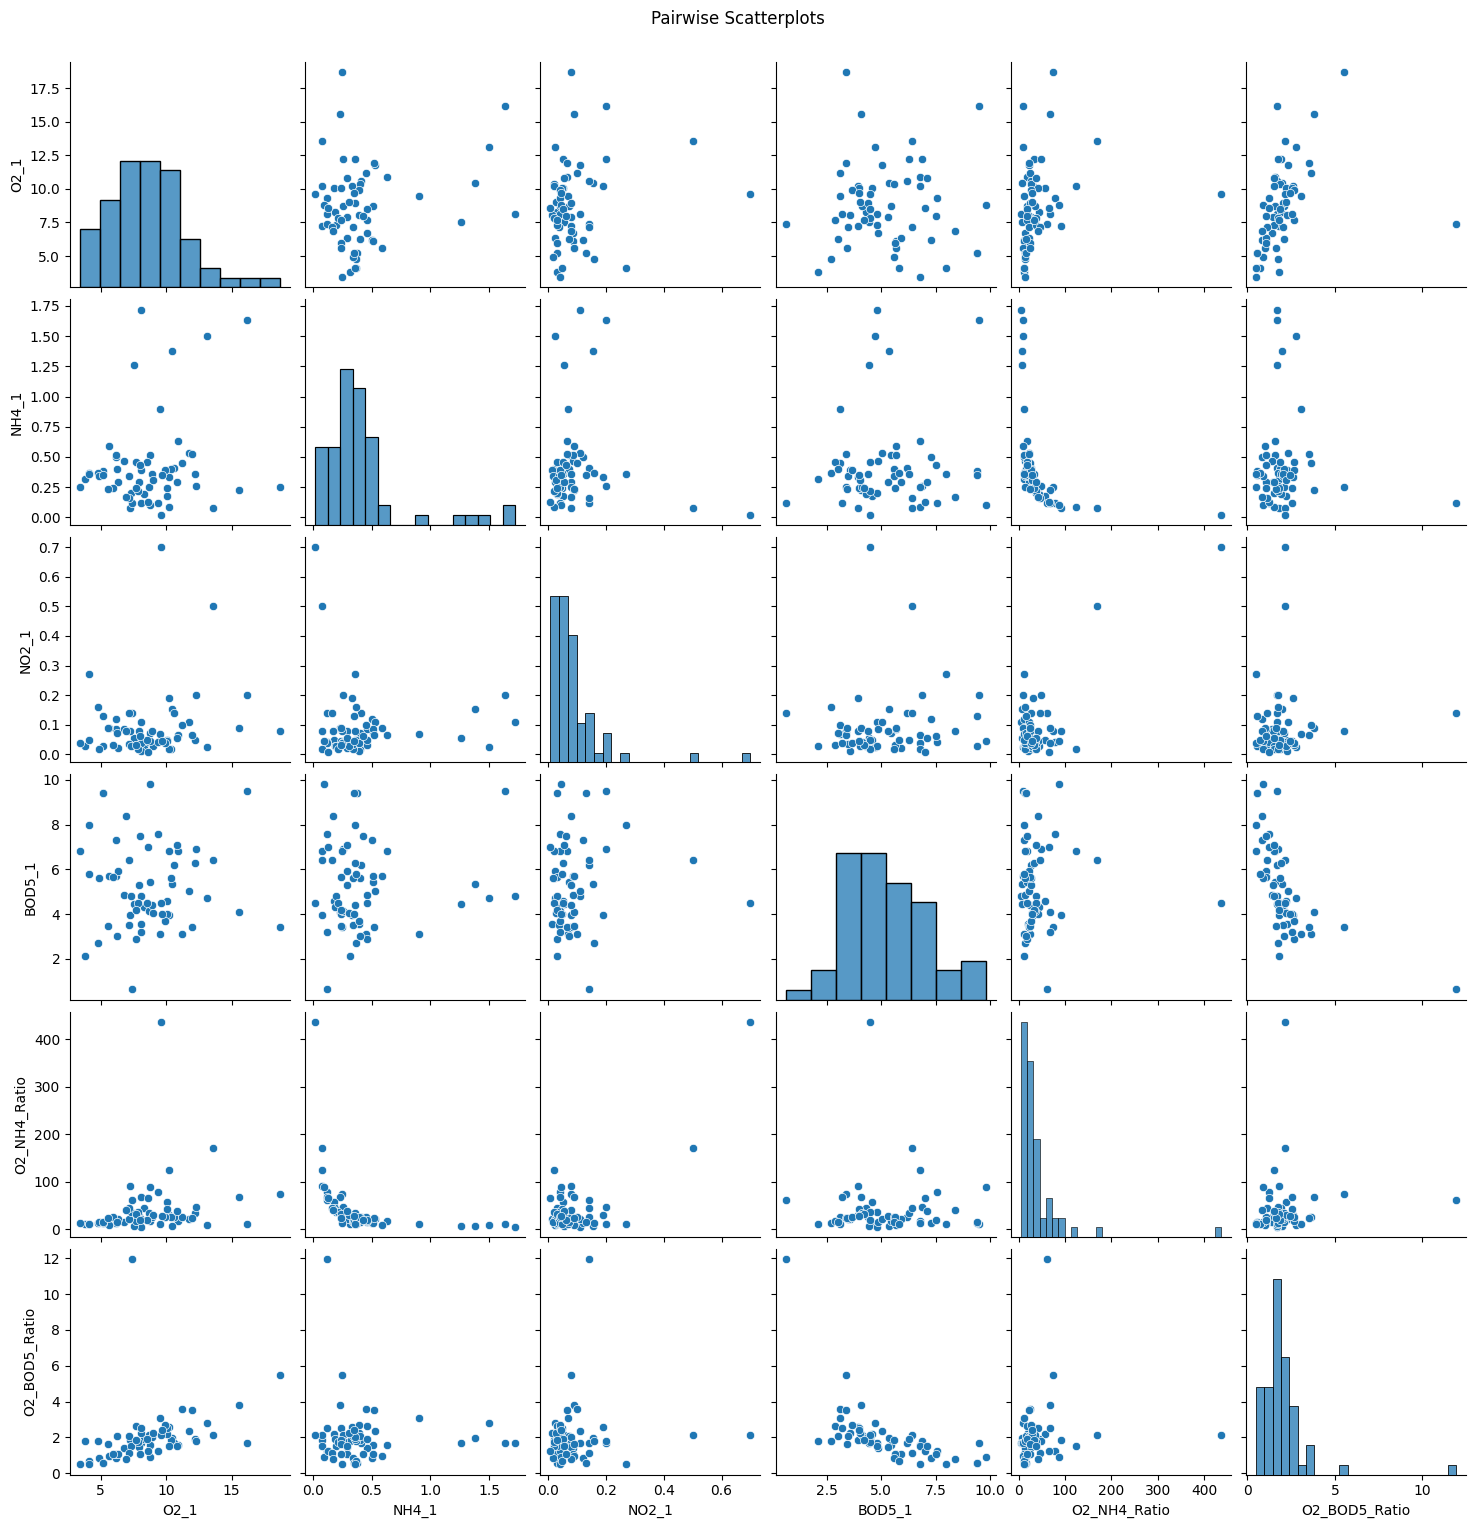

In [16]:
# Pairplot for key variables and their ratios
sns.pairplot(cleaned_data[['O2_1', 'NH4_1','NO2_1', 'BOD5_1', 'O2_NH4_Ratio', 'O2_BOD5_Ratio']])
plt.suptitle('Pairwise Scatterplots', y=1.02)
plt.show()


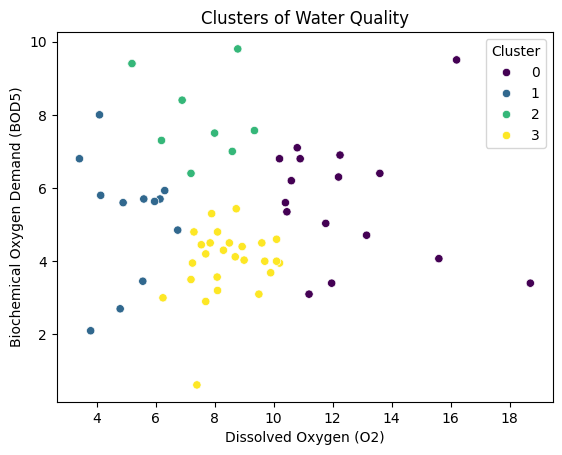

In [17]:
# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cleaned_data['Cluster'] = kmeans.fit_predict(cleaned_data[['O2_1', 'NH4_1','NO2_1' ,'BOD5_1']])

# Scatterplot of O2 vs BOD5 with clusters
sns.scatterplot(x='O2_1', y='BOD5_1', hue='Cluster', palette='viridis', data=cleaned_data)
plt.title('Clusters of Water Quality')
plt.xlabel('Dissolved Oxygen (O2)')
plt.ylabel('Biochemical Oxygen Demand (BOD5)')
plt.show()


In [18]:
# What Can We Learn from This?
# 1.If O₂ is high & BOD₅ is low - Good Water Quality (likely a separate cluster)
# 2.If O₂ is low & BOD₅ is high - Poor Water Quality (likely another cluster)
# 3.Medium values of O₂ and BOD₅ - A transition/mixed cluster

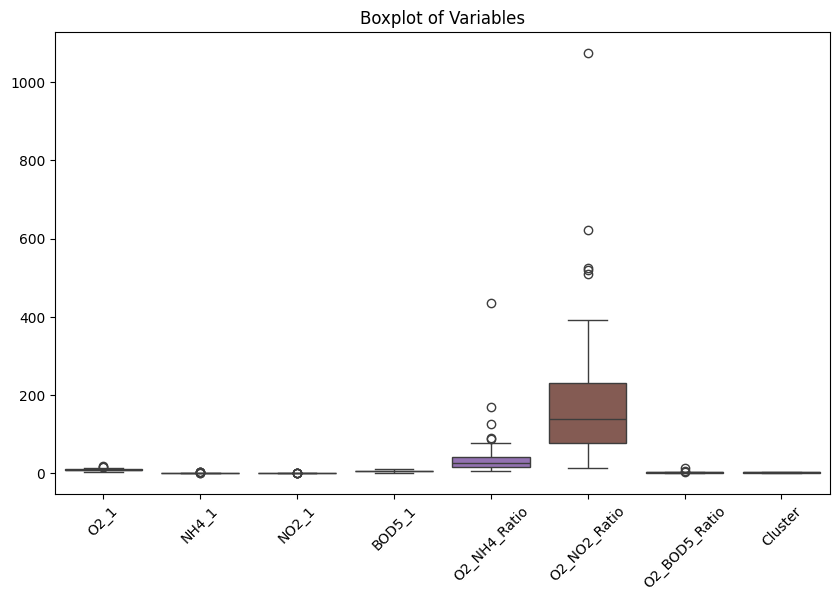

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data= cleaned_data)
plt.xticks(rotation=45)
plt.title("Boxplot of Variables")
plt.show()

In [20]:
# Identify outliers in O2/NH4 Ratio
outliers = cleaned_data[cleaned_data['O2_NH4_Ratio'] > cleaned_data['O2_NH4_Ratio'].quantile(0.95)]
print("Outliers in O2/NH4 Ratio:\n", outliers)

Outliers in O2/NH4 Ratio:
      O2_1  NH4_1  NO2_1  BOD5_1  O2_NH4_Ratio  O2_NO2_Ratio  O2_BOD5_Ratio  \
7    7.25  0.080   0.08    3.95     90.625000     90.625000       1.835443   
9   13.60  0.080   0.50    6.40    170.000000     27.200000       2.125000   
49  10.20  0.082   0.02    6.80    124.390244    510.000000       1.500000   
52   9.60  0.022   0.70    4.50    436.363636     13.714286       2.133333   

    Cluster  
7         3  
9         0  
49        0  
52        3  
